In [7]:
import psi4
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

In [2]:
psi4.core.set_output_file('output.dat', False)


In [14]:
%time
def lj(r,sigma,eps):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [15]:
%time
rvalues=[i*0.1 for i in range(35,61)]
r=np.array(rvalues)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [16]:
%%time
Ar2_geometry = """
Ar
--
Ar 1 {0}
"""

psi4.set_options({'freeze_core': 'true'})


ecp = np.zeros(r.shape[0])

for i in range(r.shape[0]):
    Ar2 = psi4.geometry(Ar2_geometry.format(r[i]))
    ecp[i] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)
ecp *= psi4.constants.hartree2kcalmol

CPU times: user 3min 27s, sys: 12.6 s, total: 3min 40s
Wall time: 3min 44s


In [17]:
popt, pcov = sci.optimize.curve_fit(lj, r, ecp)
efit=lj(r,popt[0],popt[1])



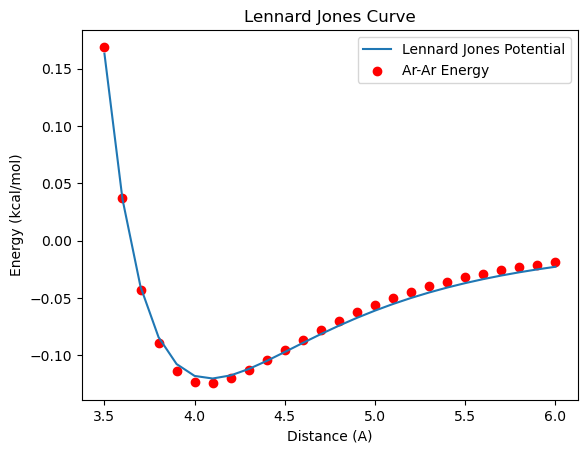

In [19]:
fig,ax=plt.subplots()
ax.plot(r,efit,label='Lennard Jones Potential')
ax.scatter(r,ecp,color='red',label='Ar-Ar Energy')
ax.set_xlabel('Distance (A)')
ax.set_ylabel('Energy (kcal/mol)')
ax.set_title('Argon Lennard Jones Curve')
plt.legend()
plt.savefig(../Week10/Figures/METADYN-1.ener)